# IPL 2022  Auction Analysis Using Python

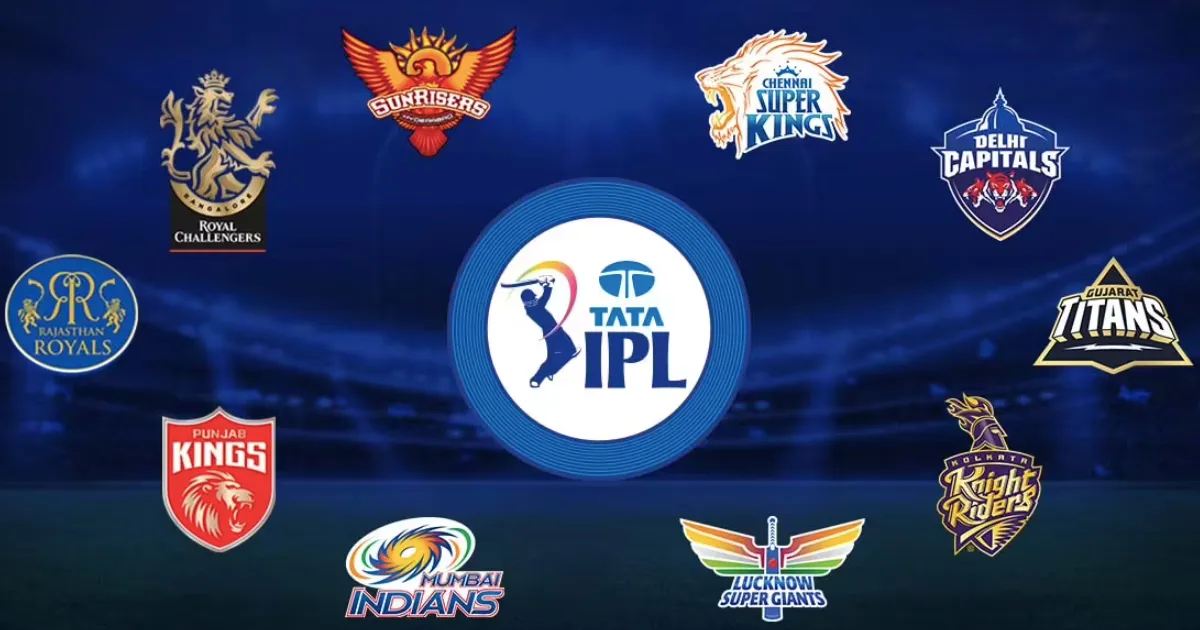

In [1]:
# install the dependencies
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
ipl=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\IPLData.csv")
ipl.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# shape of dataset
ipl.shape

(235, 16)

In [4]:
# information about dataset
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [5]:
#Describe of dataset
ipl.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [6]:
# find ot null value in dataset
ipl.isnull().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [7]:
# index of dataset
ipl.index

RangeIndex(start=0, stop=235, step=1)

In [8]:
 # Dtypes of dataset
ipl.dtypes

Player Name             object
Team                    object
Nationality             object
Player_Type             object
Capped                   int64
Matches_Played         float64
Runs                   float64
Average                float64
Strike_Rate            float64
Wickets                float64
Bowling_average        float64
Economy                float64
Bowling_Strike_Rate    float64
Catches                float64
Run_outs               float64
Stumps                 float64
dtype: object

## Cleaning The Data

In the above the player can be initally segrated based on the following parameter
  
         1-Capped-Batter ,Bowlers,Allrounders,WicketKepper
         2-Uncapped-Batter ,Bowlers,Allrounders,WicketKepper
   
The uncapped players are playing the IPL first time ,or relavent data isn't available therefore we have used thier domastics T20 performance and  T20 International performance

In [9]:
# Segregating data -capped batter
# we kept the batting performance to restrict the analysic for specific tendencies
batter=ipl.loc[(ipl["Player_Type"]=="Batter")]

batter_new=batter.loc[(batter["Capped"]==1)]

capped_batter=batter_new[["Player Name",
                           "Team" ,
                           "Nationality",
                           "Average",
                            "Matches_Played",
                            "Runs",
                            "Strike_Rate"]]                        

In [10]:
capped_batter.head()

,Player Name,Team,Nationality,Average,Matches_Played,Runs,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,34.63,192.0,5783.0,126.60
1,Shreyas Iyer,Kolkata,Indian,31.67,87.0,2375.0,123.96
2,Faf Du Plessis,Bangalore,Overseas,34.94,100.0,2935.0,131.09
3,Manish Pandey,Lucknow,Indian,30.69,154.0,3560.0,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,25.85,31.0,517.0,151.17


In [11]:
# Segregating data -capped Bowler 
# we kept the batting performance to restrict the analysic for specific tendencies
bowler=ipl.loc[(ipl["Player_Type"]=="Bowler ")]

bowler_new=bowler.loc[(bowler["Capped"]==1)]

capped_bowler=bowler_new[["Player Name",
                           "Team" ,
                           "Nationality",
                            "Matches_Played",
                            "Wickets",
                            "Economy",
                              "Bowling_average",
                              "Bowling_Strike_Rate"]]

In [12]:
capped_bowler.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Economy,Bowling_average,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,8.21,20.53,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,8.40,26.09,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,8.63,30.41,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,8.24,34.40,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,7.80,29.19,22.44


In [13]:
# Segregating data -capped Keeper
# we kept the batting performance to restrict the analysic for specific tendencies
Keeper=ipl.loc[(ipl["Player_Type"]=="Keeper")]

Keeper_new=Keeper.loc[(Keeper["Capped"] == 1)]

capped_Keeper=Keeper_new[["Player Name",
                           "Team" ,
                           "Nationality",
                            "Matches_Played",
                             "Average",
                            "Runs",
                            "Strike_Rate",
                            "Catches" ,
                            "Run_outs",
                            "Stumps"]]                        

In [14]:
capped_Keeper.head()

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,31.3,2256.0,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,29.4,3916.0,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,28.5,1452.0,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,41.5,1038.0,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,25.8,4046.0,129.7,123.0,14.0,32.0


In [35]:
# Segregating data -capped Allrounder
# we kept the batting performance to restrict the analysic for specific tendencies
Allrounder=ipl.loc[(ipl["Player_Type"]=="Allrounder")]

Allrounder_new=Allrounder.loc[(Allrounder["Capped"] == 1)]

capped_Allrounder=Allrounder_new[["Player Name",
                           "Team" ,
                           "Nationality",
                            "Matches_Played",
                                  "Average",
                            "Runs",
                            "Strike_Rate",
                            "Wickets" ,
                            "Bowling_average",
                            "Economy",
                            "Bowling_Strike_Rate"]]    

In [36]:
capped_Allrounder.head()

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,11.12,456.0,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,22.94,1537.0,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,28.00,1820.0,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,14.54,189.0,121.15,35.0,22.46,8.20,16.43


In [17]:
# Cleaning the data by making the null or NAN values 0.
capped_batter=capped_batter.fillna(0)
capped_bowler=capped_bowler.fillna(0)
capped_Keeper=capped_Keeper.fillna(0)
capped_Allrounder=capped_Allrounder.fillna(0)

In [18]:
# Checking  the null values in data
print(capped_batter.isnull().sum())
print(capped_bowler.isnull().sum())
print(capped_Keeper.isnull().sum())
print(capped_Allrounder.isnull().sum())

Player Name       0
Team              0
Nationality       0
Average           0
Matches_Played    0
Runs              0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Economy                0
Bowling_average        0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Average           0
Runs              0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64


## Inital Analysis

In this section ,we will analyze data for batter ,bowler, keepers and allrounders

In [19]:
# Analyzing the batter data
# bater have a average is greater  than 32
top_batter=capped_batter.loc[(capped_batter["Average"]>=32.0)]

# sorting the data descending oerder. with respect to each parameter
top_batter_average=top_batter.sort_values('Average',ascending=False)
top_batter_strick_rate=top_batter.sort_values('Strike_Rate',ascending=False)
top_batter_Runs=top_batter.sort_values('Runs',ascending=False)
top_batter_matches=top_batter.sort_values('Matches_Played',ascending=False)

In [20]:
top_batter_average

,Player Name,Team,Nationality,Average,Matches_Played,Runs,Strike_Rate
212,KL Rahul,Lucknow,Indian,47.43,94.0,3273.0,136.38
231,Ruturaj Gaikwad,Chennai,Indian,46.61,22.0,839.0,132.13
19,David Warner,Delhi,Overseas,41.60,150.0,5449.0,139.97
207,Kane Williamson,Hyderabad,Overseas,40.11,63.0,1885.0,131.27
208,Virat Kohli,Bangalore,Indian,37.40,207.0,6283.0,129.95
2,Faf Du Plessis,Bangalore,Overseas,34.94,100.0,2935.0,131.09
0,Shikhar Dhawan,Punjab,Indian,34.63,192.0,5783.0,126.60
26,David Miller,Gujarat,Overseas,32.90,89.0,1974.0,136.51


In [21]:
top_batter_strick_rate

,Player Name,Team,Nationality,Average,Matches_Played,Runs,Strike_Rate
19,David Warner,Delhi,Overseas,41.60,150.0,5449.0,139.97
26,David Miller,Gujarat,Overseas,32.90,89.0,1974.0,136.51
212,KL Rahul,Lucknow,Indian,47.43,94.0,3273.0,136.38
231,Ruturaj Gaikwad,Chennai,Indian,46.61,22.0,839.0,132.13
207,Kane Williamson,Hyderabad,Overseas,40.11,63.0,1885.0,131.27
2,Faf Du Plessis,Bangalore,Overseas,34.94,100.0,2935.0,131.09
208,Virat Kohli,Bangalore,Indian,37.40,207.0,6283.0,129.95
0,Shikhar Dhawan,Punjab,Indian,34.63,192.0,5783.0,126.60


In [22]:
top_batter_Runs

,Player Name,Team,Nationality,Average,Matches_Played,Runs,Strike_Rate
208,Virat Kohli,Bangalore,Indian,37.40,207.0,6283.0,129.95
0,Shikhar Dhawan,Punjab,Indian,34.63,192.0,5783.0,126.60
19,David Warner,Delhi,Overseas,41.60,150.0,5449.0,139.97
212,KL Rahul,Lucknow,Indian,47.43,94.0,3273.0,136.38
2,Faf Du Plessis,Bangalore,Overseas,34.94,100.0,2935.0,131.09
26,David Miller,Gujarat,Overseas,32.90,89.0,1974.0,136.51
207,Kane Williamson,Hyderabad,Overseas,40.11,63.0,1885.0,131.27
231,Ruturaj Gaikwad,Chennai,Indian,46.61,22.0,839.0,132.13


In [23]:
top_batter_matches

,Player Name,Team,Nationality,Average,Matches_Played,Runs,Strike_Rate
208,Virat Kohli,Bangalore,Indian,37.40,207.0,6283.0,129.95
0,Shikhar Dhawan,Punjab,Indian,34.63,192.0,5783.0,126.60
19,David Warner,Delhi,Overseas,41.60,150.0,5449.0,139.97
2,Faf Du Plessis,Bangalore,Overseas,34.94,100.0,2935.0,131.09
212,KL Rahul,Lucknow,Indian,47.43,94.0,3273.0,136.38
26,David Miller,Gujarat,Overseas,32.90,89.0,1974.0,136.51
207,Kane Williamson,Hyderabad,Overseas,40.11,63.0,1885.0,131.27
231,Ruturaj Gaikwad,Chennai,Indian,46.61,22.0,839.0,132.13


In [28]:
# Analyzing the bowler data
# bower have a Bowling_average is less  than 24
top_Bowler=capped_bowler.loc[(capped_bowler["Bowling_average"]<=24.0)]

# sorting the data descending oerder. with respect to each parameter
top_Bowler_average=top_Bowler.sort_values('Bowling_average')
top_Bowler_strick_rate=top_Bowler.sort_values('Bowling_Strike_Rate')
top_Bowler_wicket=top_Bowler.sort_values('Wickets',ascending=False)
top_Bowler_economy=top_Bowler.sort_values('Economy')
top_Bowler_matches=top_Bowler.sort_values('Matches_Played',ascending=False)

In [29]:
top_Bowler_average

,Player Name,Team,Nationality,Matches_Played,Wickets,Economy,Bowling_average,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,10.50,0.00,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,11.40,0.00,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,8.00,0.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,10.04,14.50,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,8.30,17.92,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,8.21,20.53,15.00
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,7.65,20.56,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,7.52,21.92,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,7.59,22.28,17.61
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,8.78,22.30,15.23


In [30]:
top_Bowler_strick_rate

,Player Name,Team,Nationality,Matches_Played,Wickets,Economy,Bowling_average,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,10.50,0.00,0.00
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,11.40,0.00,0.00
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,8.00,0.00,0.00
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,10.04,14.50,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,8.30,17.92,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,8.21,20.53,15.00
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,8.78,22.30,15.23
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,7.65,20.56,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,7.52,21.92,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,7.59,22.28,17.61


In [31]:
top_Bowler_wicket

,Player Name,Team,Nationality,Matches_Played,Wickets,Economy,Bowling_average,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,7.59,22.28,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,7.42,23.05,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,8.21,20.53,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,7.52,21.92,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,6.82,23.31,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,7.65,20.56,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,8.78,22.30,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,8.30,17.92,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,10.04,14.50,8.67
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,10.50,0.00,0.00


In [32]:
top_Bowler_economy

,Player Name,Team,Nationality,Matches_Played,Wickets,Economy,Bowling_average,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,6.82,23.31,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,7.42,23.05,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,7.52,21.92,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,7.59,22.28,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,7.65,20.56,16.12
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,8.00,0.00,0.00
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,8.21,20.53,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,8.30,17.92,12.96
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,8.78,22.30,15.23
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,10.04,14.50,8.67


In [33]:
top_Bowler_matches

,Player Name,Team,Nationality,Matches_Played,Wickets,Economy,Bowling_average,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,7.59,22.28,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,7.42,23.05,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,8.21,20.53,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,7.52,21.92,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,6.82,23.31,20.50
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,7.65,20.56,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,8.78,22.30,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,8.30,17.92,12.96
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,10.04,14.50,8.67
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,11.40,0.00,0.00


In [38]:
# Analyzing the Allrounder data
# Allrounder have a strickrate is greater  than 32
top_allrounder=capped_Allrounder.loc[(capped_Allrounder["Strike_Rate"]>=140.0)]

# sorting the data descending oerder. with respect to each parameter
top_allrounder_average=top_allrounder.sort_values('Average',ascending=False)
top_allrounder_strick_rate=top_allrounder.sort_values('Strike_Rate',ascending=False)
top_allrounder_Runs=top_allrounder.sort_values('Runs',ascending=False)
top_allrounder_matches=top_allrounder.sort_values('Matches_Played',ascending=False)
top_allrounder_average=top_allrounder.sort_values('Bowling_average')
top_allrounder_strick_rate=top_allrounder.sort_values('Bowling_Strike_Rate')
top_allrounder_wicket=top_allrounder.sort_values('Wickets',ascending=False)
top_allrounder_economy=top_allrounder.sort_values('Economy')
top_allrounder_matches=top_allrounder.sort_values('Matches_Played',ascending=False)

In [39]:
top_allrounder_average

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,13.30,40.0,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18


In [40]:
top_allrounder_strick_rate

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,13.30,40.0,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18


In [41]:
top_allrounder_Runs

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,14.31,186.0,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38


In [42]:
top_allrounder_matches

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,14.31,186.0,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38


In [43]:
top_allrounder_average

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,13.30,40.0,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18


In [44]:
top_allrounder_strick_rate

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,13.30,40.0,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18


In [45]:
top_allrounder_wicket

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,14.31,186.0,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38


In [46]:
top_allrounder_economy

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
202,Aman Khan,Kolkata,Indian,5.0,13.30,40.0,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
154,K Gowtham,Lucknow,Indian,24.0,14.31,186.0,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51


In [47]:
top_allrounder_matches

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,29.98,3268.0,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,15.64,954.0,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,25.23,2018.0,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,27.33,1476.0,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,29.31,1700.0,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,19.75,316.0,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,15.00,195.0,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,22.97,666.0,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,14.31,186.0,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,15.00,180.0,151.26,13.0,31.38,7.14,26.38


## Top Allrounders above Analysis
### 1. Ander Russle
### 2. Sunil Narine	
### 3. Hardik Pandya
### 4.Jofra Archer

In [48]:
# Analyzing the keeper data
# Allrounder have a average is greater  than 25
top_kepper=capped_Keeper.loc[(capped_Keeper["Average"]<=25.0)]

# sorting the data descending oerder. with respect to each parameter
top_kepper_average=top_kepper.sort_values('Average',ascending=False)
top_kepper_strick_rate=top_kepper.sort_values('Strike_Rate',ascending=False)
top_kepper_Runs=top_kepper.sort_values('Runs',ascending=False)
top_kepper_matches=top_kepper.sort_values('Matches_Played',ascending=False)
top_kepperr_Catches=top_kepper.sort_values('Catches')
top_kepper_Run_outs=top_kepper.sort_values('Run_outs')
top_kepper_Stumps=top_kepper.sort_values('Stumps',ascending=False)

In [49]:
top_kepper_average

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
118,Wridhhiman Saha,Gujarat,Indian,133.0,24.5,2110.0,128.7,69.0,3.0,20.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,22.4,606.0,155.0,11.0,3.0,0.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,19.0,38.0,122.6,2.0,0.0,0.0
117,Sam Billings,Kolkata,Overseas,22.0,17.6,334.0,133.6,13.0,1.0,0.0
120,N Jagadeesan,Chennai,Indian,5.0,16.5,33.0,113.8,0.0,0.0,0.0
113,Prabhsimran Singh,Punjab,Indian,5.0,10.0,50.0,90.9,2.0,0.0,0.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,6.3,19.0,73.1,0.0,0.0,2.0
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.0,0.0,3.0,0.0,0.0


In [50]:
top_kepper_strick_rate

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
110,Nicholas Pooran,Hyderabad,Overseas,33.0,22.4,606.0,155.0,11.0,3.0,0.0
117,Sam Billings,Kolkata,Overseas,22.0,17.6,334.0,133.6,13.0,1.0,0.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,24.5,2110.0,128.7,69.0,3.0,20.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,19.0,38.0,122.6,2.0,0.0,0.0
120,N Jagadeesan,Chennai,Indian,5.0,16.5,33.0,113.8,0.0,0.0,0.0
113,Prabhsimran Singh,Punjab,Indian,5.0,10.0,50.0,90.9,2.0,0.0,0.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,6.3,19.0,73.1,0.0,0.0,2.0
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.0,0.0,3.0,0.0,0.0


In [51]:
top_kepper_Runs

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
118,Wridhhiman Saha,Gujarat,Indian,133.0,24.5,2110.0,128.7,69.0,3.0,20.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,22.4,606.0,155.0,11.0,3.0,0.0
117,Sam Billings,Kolkata,Overseas,22.0,17.6,334.0,133.6,13.0,1.0,0.0
113,Prabhsimran Singh,Punjab,Indian,5.0,10.0,50.0,90.9,2.0,0.0,0.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,19.0,38.0,122.6,2.0,0.0,0.0
120,N Jagadeesan,Chennai,Indian,5.0,16.5,33.0,113.8,0.0,0.0,0.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,6.3,19.0,73.1,0.0,0.0,2.0
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.0,0.0,3.0,0.0,0.0


In [52]:
top_kepper_matches

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
118,Wridhhiman Saha,Gujarat,Indian,133.0,24.5,2110.0,128.7,69.0,3.0,20.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,22.4,606.0,155.0,11.0,3.0,0.0
117,Sam Billings,Kolkata,Overseas,22.0,17.6,334.0,133.6,13.0,1.0,0.0
113,Prabhsimran Singh,Punjab,Indian,5.0,10.0,50.0,90.9,2.0,0.0,0.0
120,N Jagadeesan,Chennai,Indian,5.0,16.5,33.0,113.8,0.0,0.0,0.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,19.0,38.0,122.6,2.0,0.0,0.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,6.3,19.0,73.1,0.0,0.0,2.0
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.0,0.0,3.0,0.0,0.0


In [53]:
top_kepperr_Catches

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
120,N Jagadeesan,Chennai,Indian,5.0,16.5,33.0,113.8,0.0,0.0,0.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,6.3,19.0,73.1,0.0,0.0,2.0
113,Prabhsimran Singh,Punjab,Indian,5.0,10.0,50.0,90.9,2.0,0.0,0.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,19.0,38.0,122.6,2.0,0.0,0.0
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.0,0.0,3.0,0.0,0.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,22.4,606.0,155.0,11.0,3.0,0.0
117,Sam Billings,Kolkata,Overseas,22.0,17.6,334.0,133.6,13.0,1.0,0.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,24.5,2110.0,128.7,69.0,3.0,20.0


In [54]:
top_kepper_Run_outs

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.0,0.0,3.0,0.0,0.0
113,Prabhsimran Singh,Punjab,Indian,5.0,10.0,50.0,90.9,2.0,0.0,0.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,19.0,38.0,122.6,2.0,0.0,0.0
120,N Jagadeesan,Chennai,Indian,5.0,16.5,33.0,113.8,0.0,0.0,0.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,6.3,19.0,73.1,0.0,0.0,2.0
117,Sam Billings,Kolkata,Overseas,22.0,17.6,334.0,133.6,13.0,1.0,0.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,22.4,606.0,155.0,11.0,3.0,0.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,24.5,2110.0,128.7,69.0,3.0,20.0


In [55]:
top_kepper_Stumps

,Player Name,Team,Nationality,Matches_Played,Average,Runs,Strike_Rate,Catches,Run_outs,Stumps
118,Wridhhiman Saha,Gujarat,Indian,133.0,24.5,2110.0,128.7,69.0,3.0,20.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,6.3,19.0,73.1,0.0,0.0,2.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,22.4,606.0,155.0,11.0,3.0,0.0
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.0,0.0,3.0,0.0,0.0
113,Prabhsimran Singh,Punjab,Indian,5.0,10.0,50.0,90.9,2.0,0.0,0.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,19.0,38.0,122.6,2.0,0.0,0.0
117,Sam Billings,Kolkata,Overseas,22.0,17.6,334.0,133.6,13.0,1.0,0.0
120,N Jagadeesan,Chennai,Indian,5.0,16.5,33.0,113.8,0.0,0.0,0.0


## Top Wicket-Keeper above Analysis
### 1. M S Dhoni
### 2. Dinesh Kartik
### 3. Rishabh Pant

# Viasualization for Enhanced Analysis

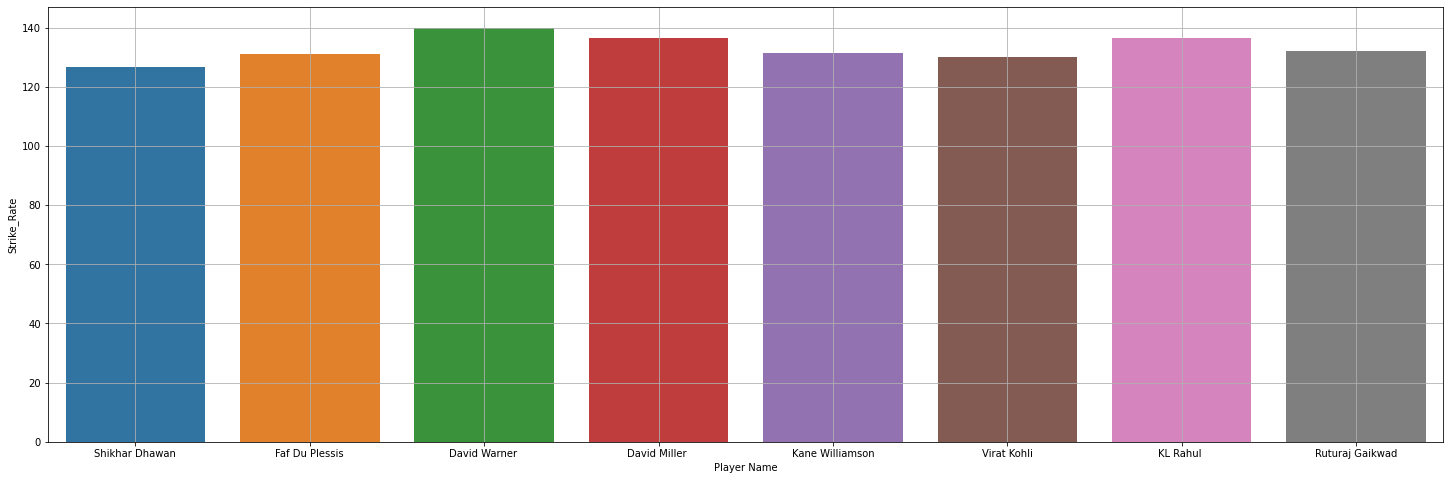

In [60]:
# Visualization top batter Strick rate
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_batter)
plt.grid(True)
plt.show()

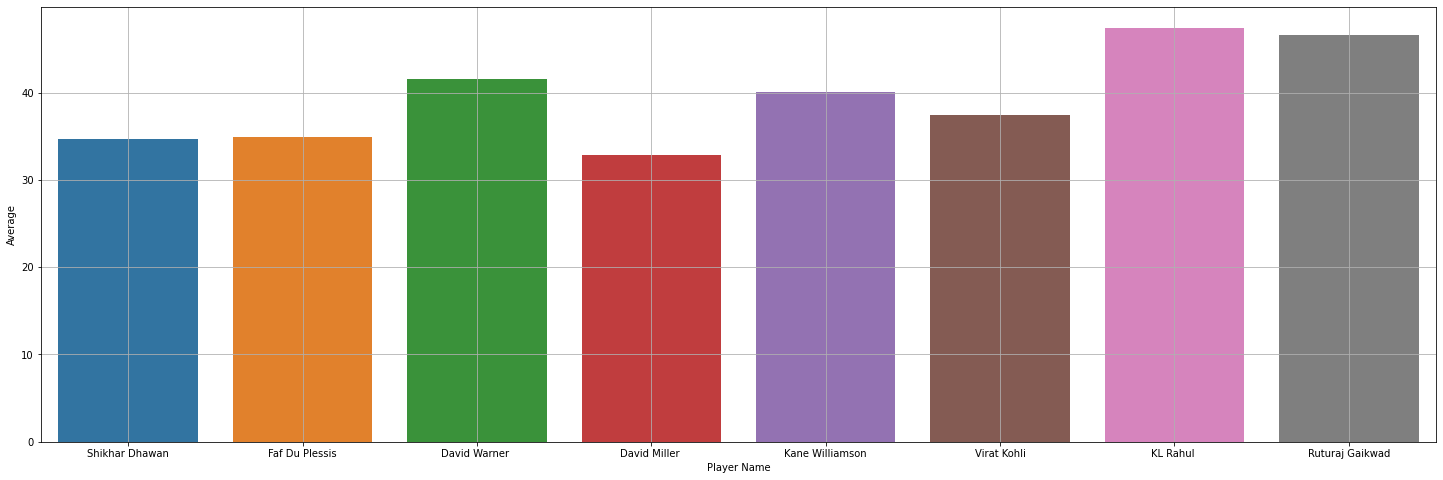

In [61]:
# Visualization top batter average
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Average',data=top_batter)
plt.grid(True)
plt.show()

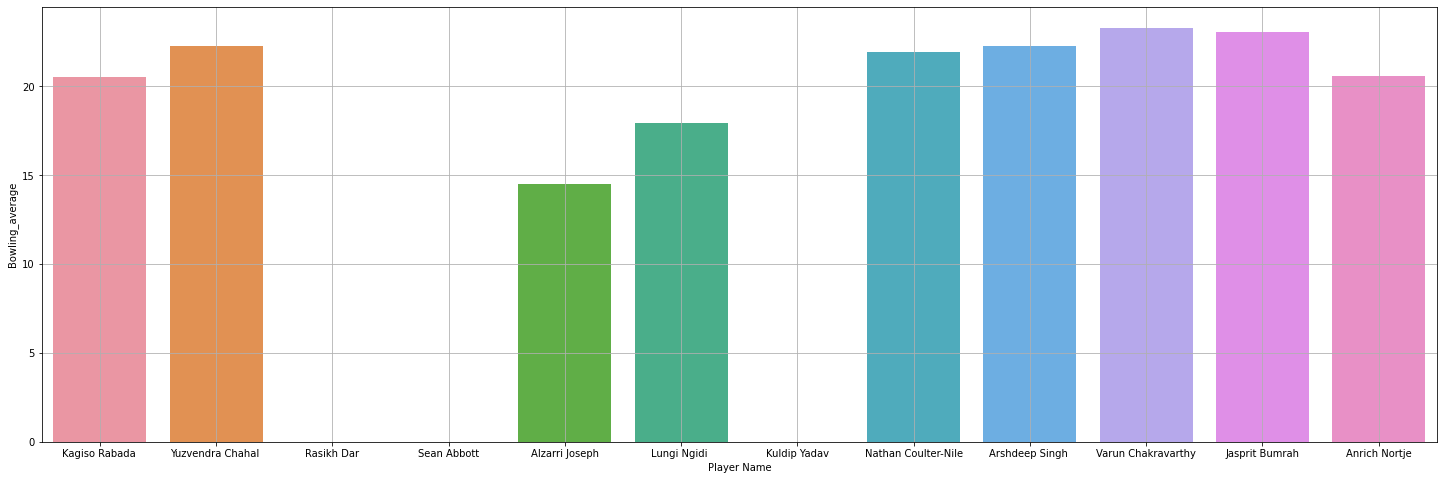

In [62]:
# Visualization top bowler average
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Bowling_average',data=top_Bowler)
plt.grid(True)
plt.show()

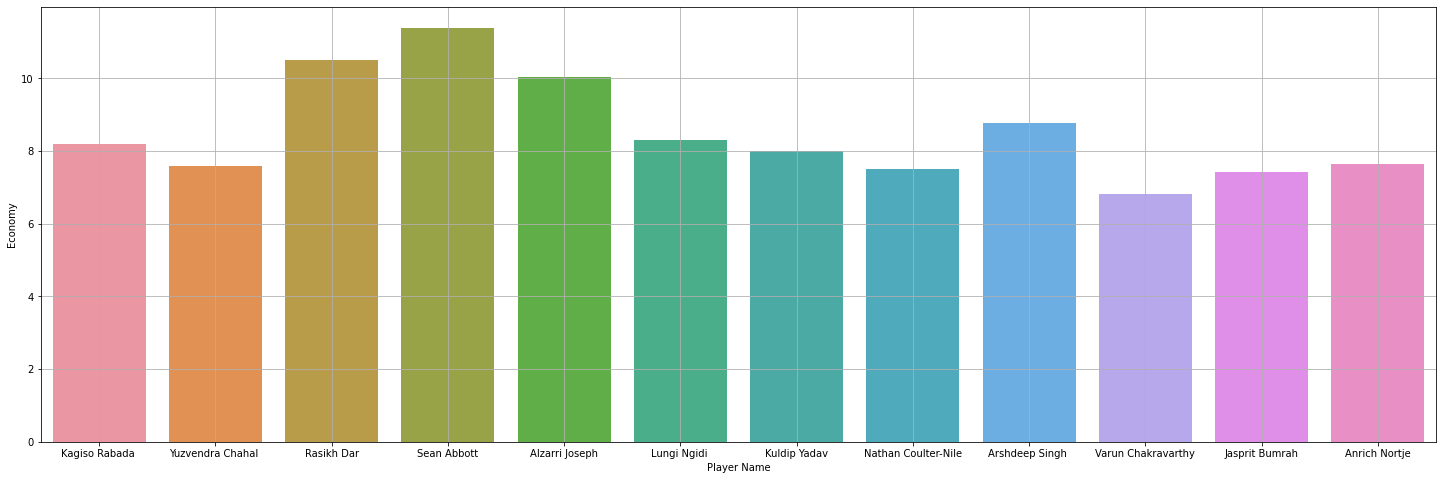

In [63]:
# Visualization top bowler economy
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Economy',data=top_Bowler)
plt.grid(True)
plt.show()

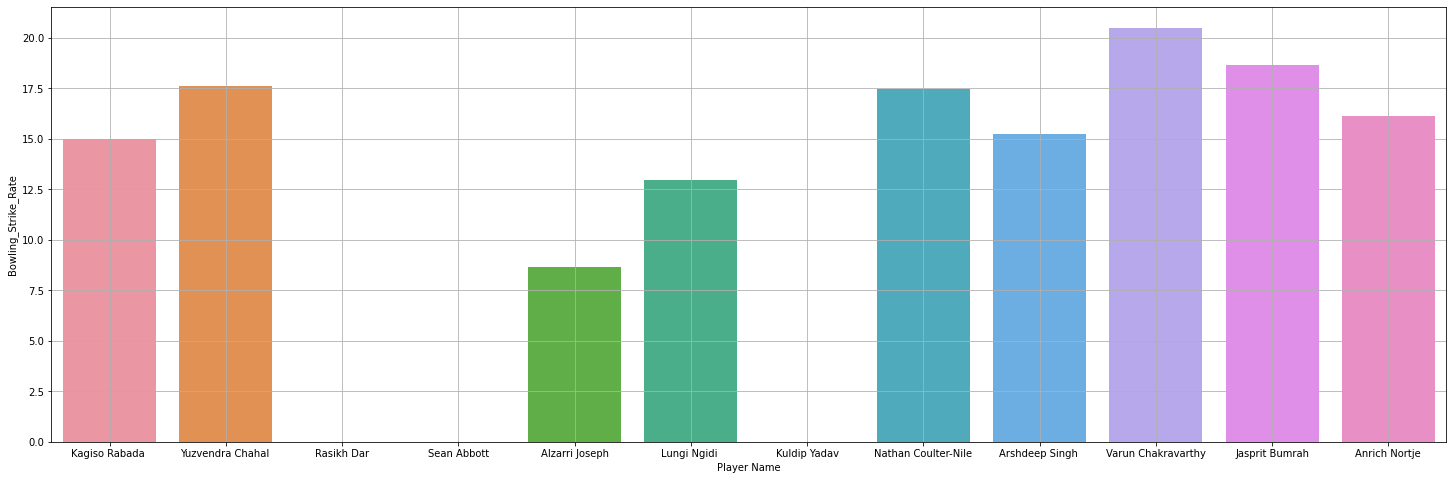

In [64]:
# Visualization top bowler bowling strick  rate
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Bowling_Strike_Rate',data=top_Bowler)
plt.grid(True)
plt.show()

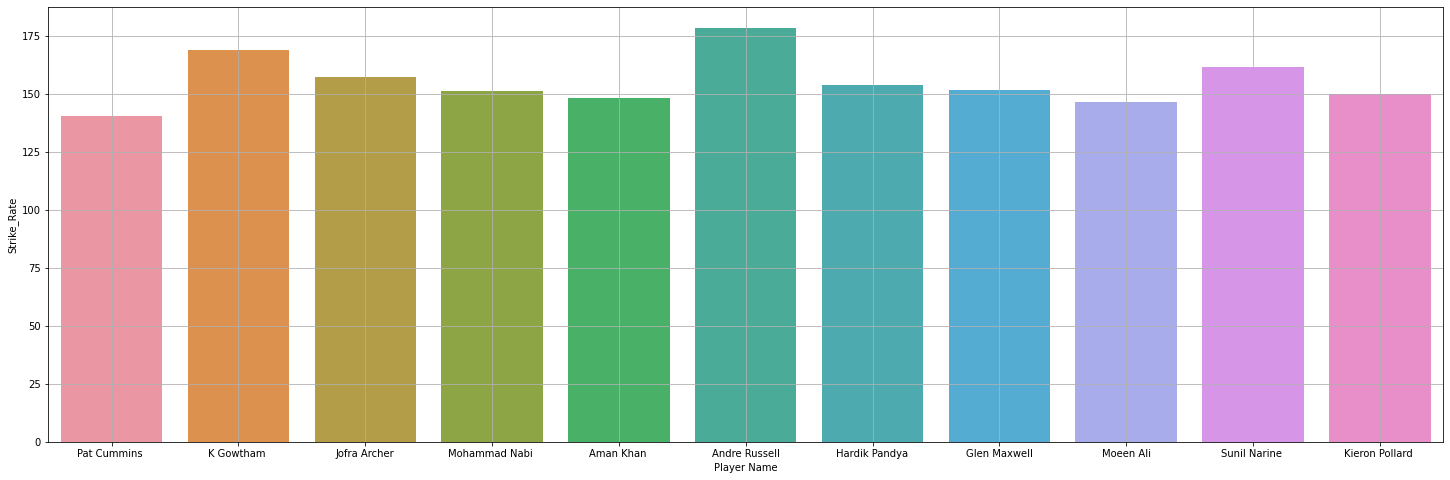

In [65]:
# Visualization top allrounder strick  rate
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_allrounder)
plt.grid(True)
plt.show()

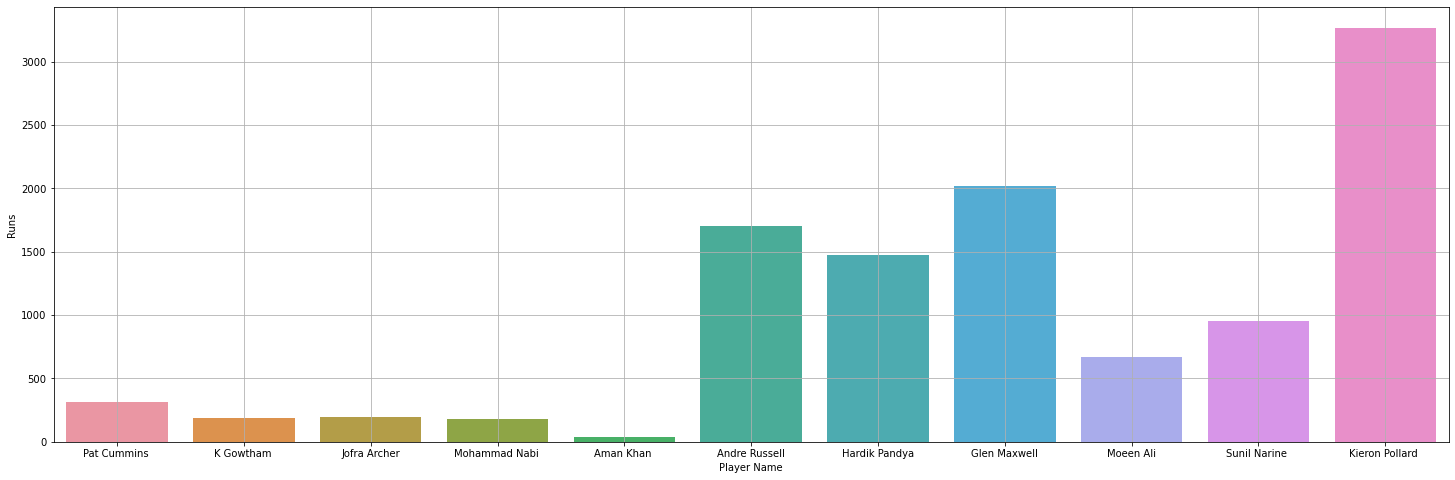

In [66]:
# Visualization top allrounder runs
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Runs',data=top_allrounder)
plt.grid(True)
plt.show()

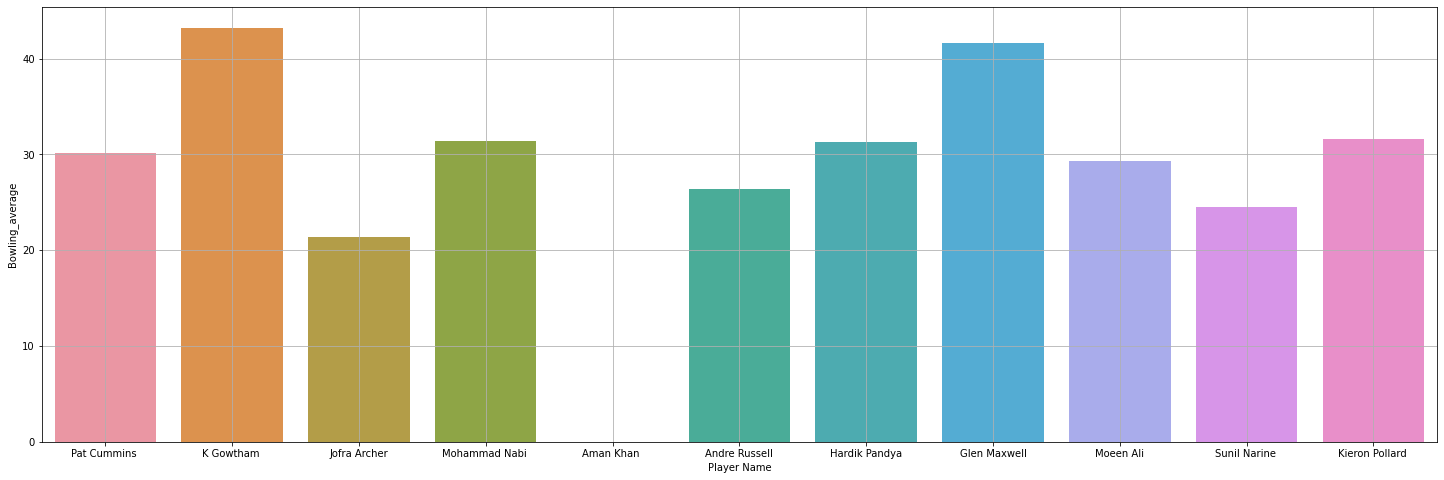

In [67]:
# Visualization top allrounder bollwing average
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Bowling_average',data=top_allrounder)
plt.grid(True)
plt.show()

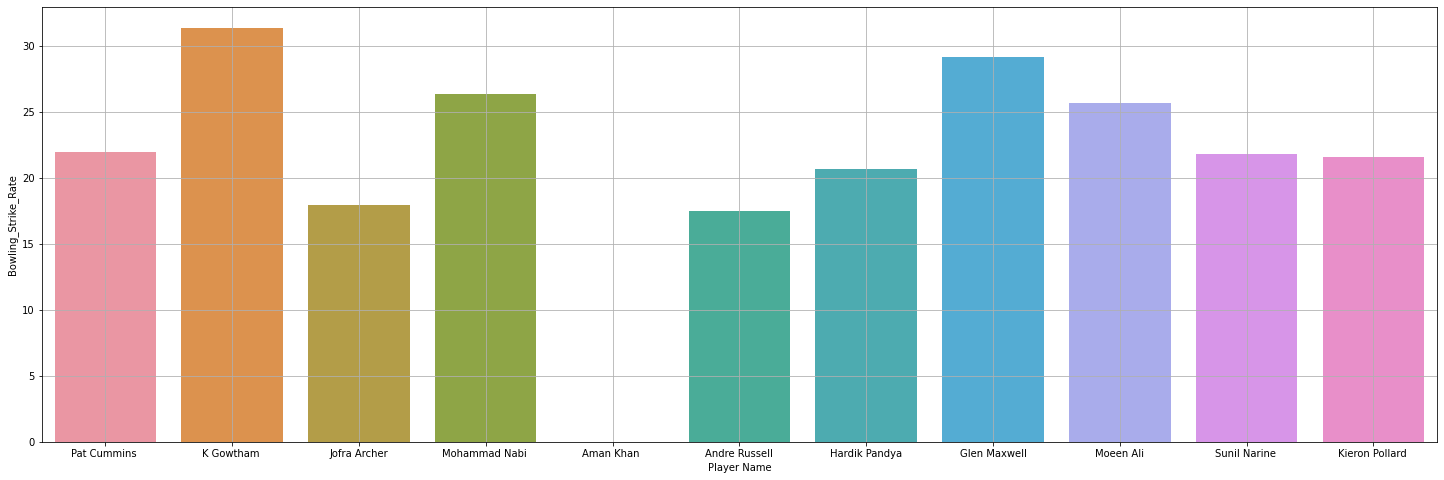

In [68]:
# Visualization top allrounder bollwing strick rate
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Bowling_Strike_Rate',data=top_allrounder)
plt.grid(True)
plt.show()

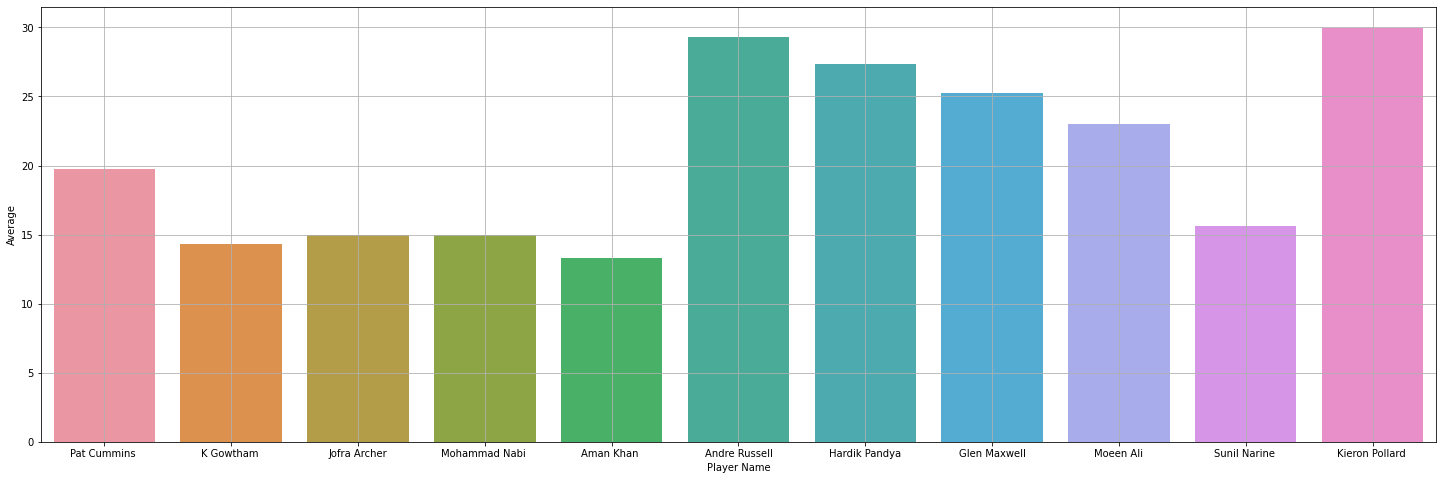

In [69]:
# Visualization top allrounder bollwing average
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Average',data=top_allrounder)
plt.grid(True)
plt.show()

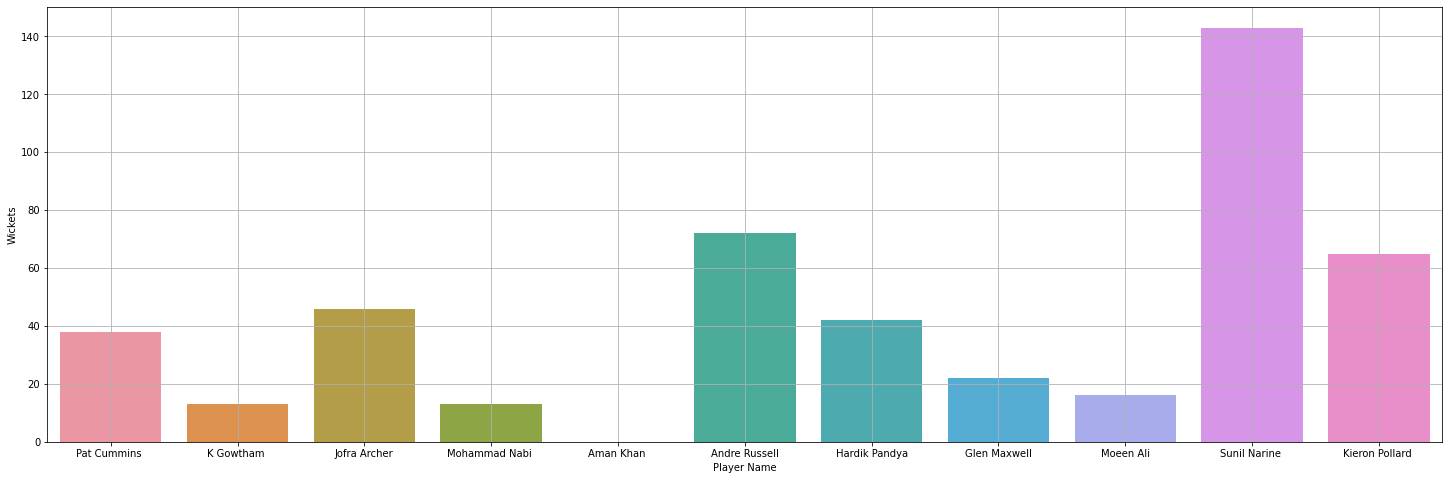

In [70]:
# Visualization top allrounder wicket
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Wickets',data=top_allrounder)
plt.grid(True)
plt.show()

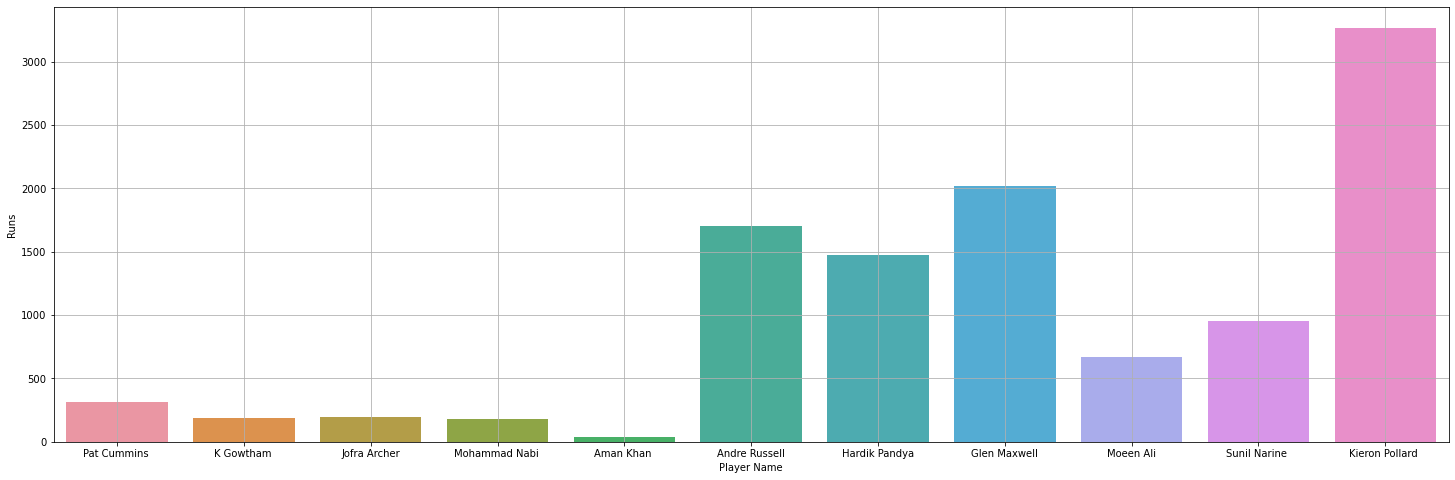

In [71]:
# Visualization top allrounder wicket
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Runs',data=top_allrounder)
plt.grid(True)
plt.show()

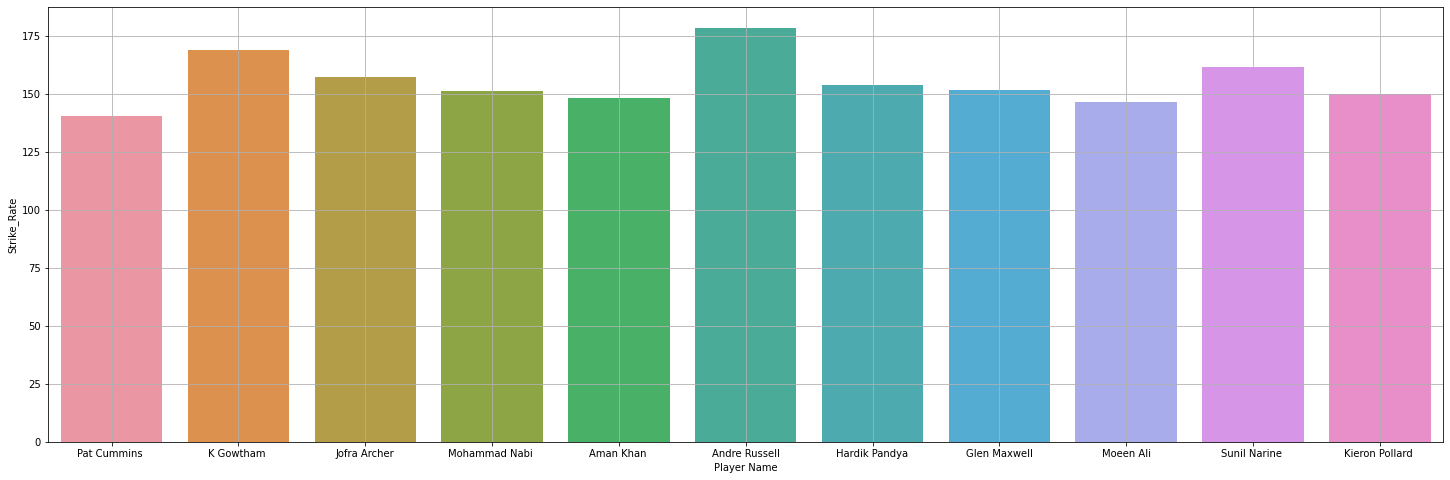

In [72]:
# Visualization top allrounder strick rate
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_allrounder)
plt.grid(True)
plt.show()

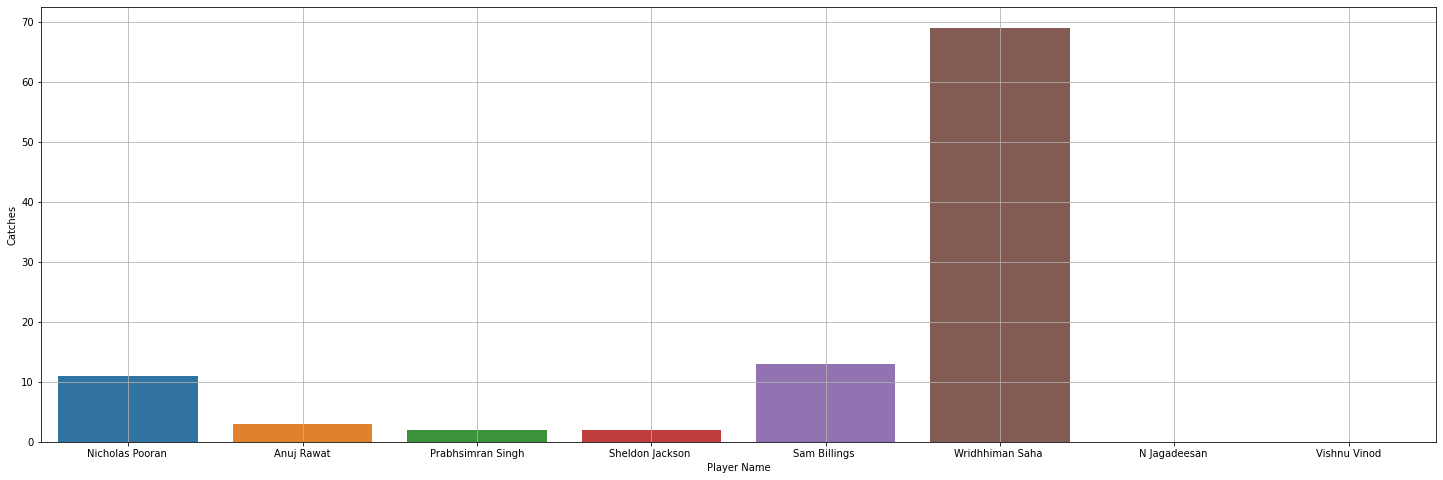

In [73]:
# Visualization top keeper strick rate
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Catches',data=top_kepper)
plt.grid(True)
plt.show()

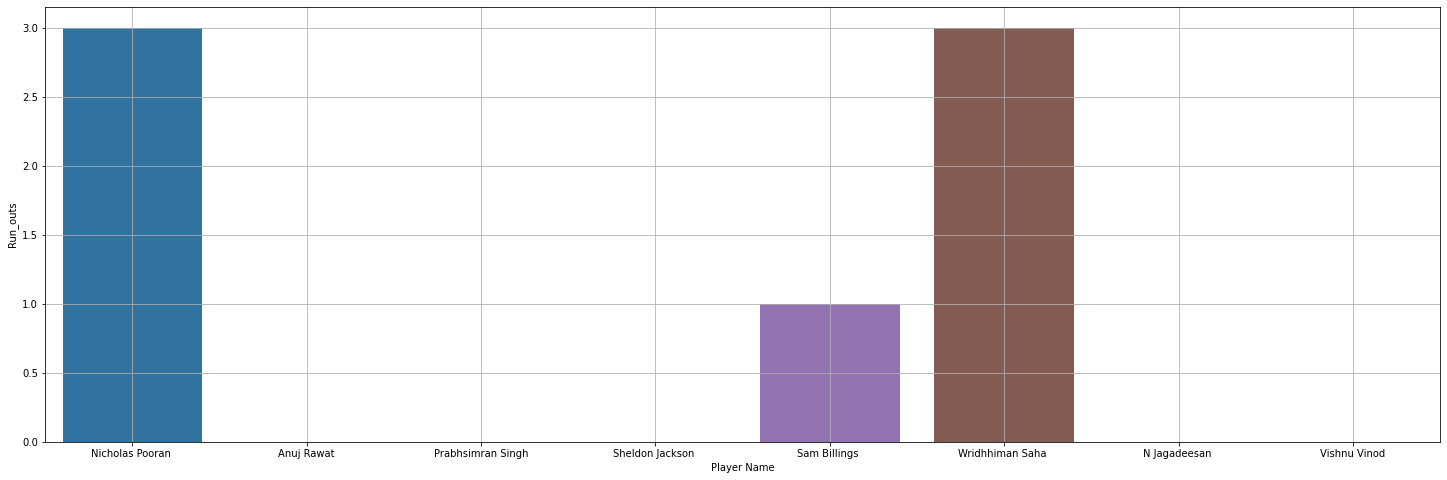

In [74]:
# Visualization top keeper Run_outs
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Run_outs',data=top_kepper)
plt.grid(True)
plt.show()

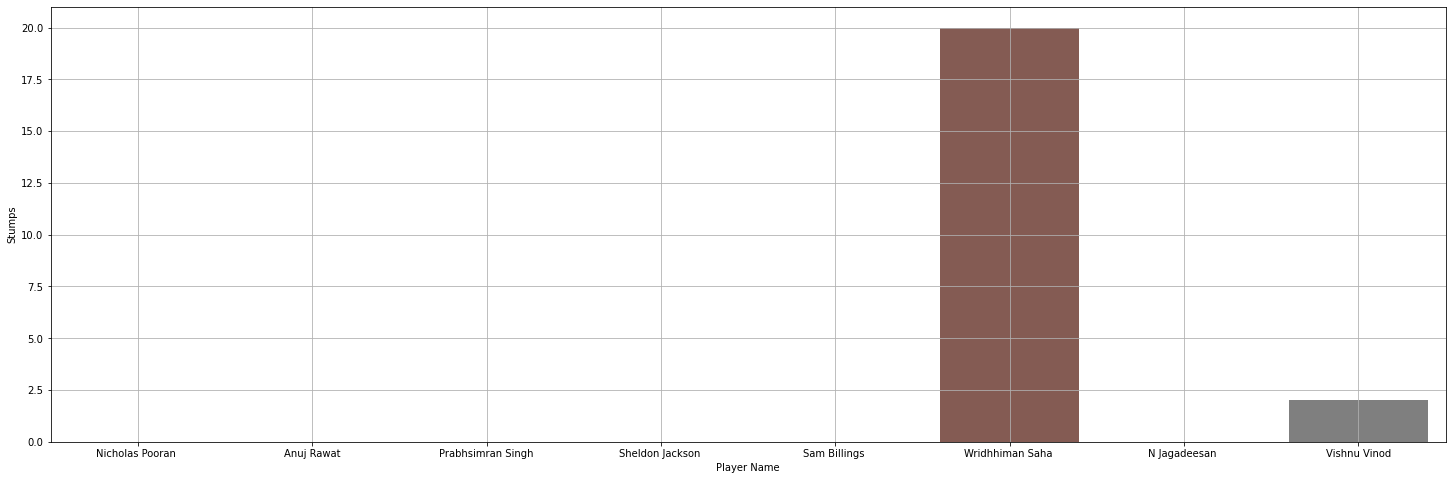

In [75]:
# Visualization top keeper Stumps
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Stumps',data=top_kepper)
plt.grid(True)
plt.show()

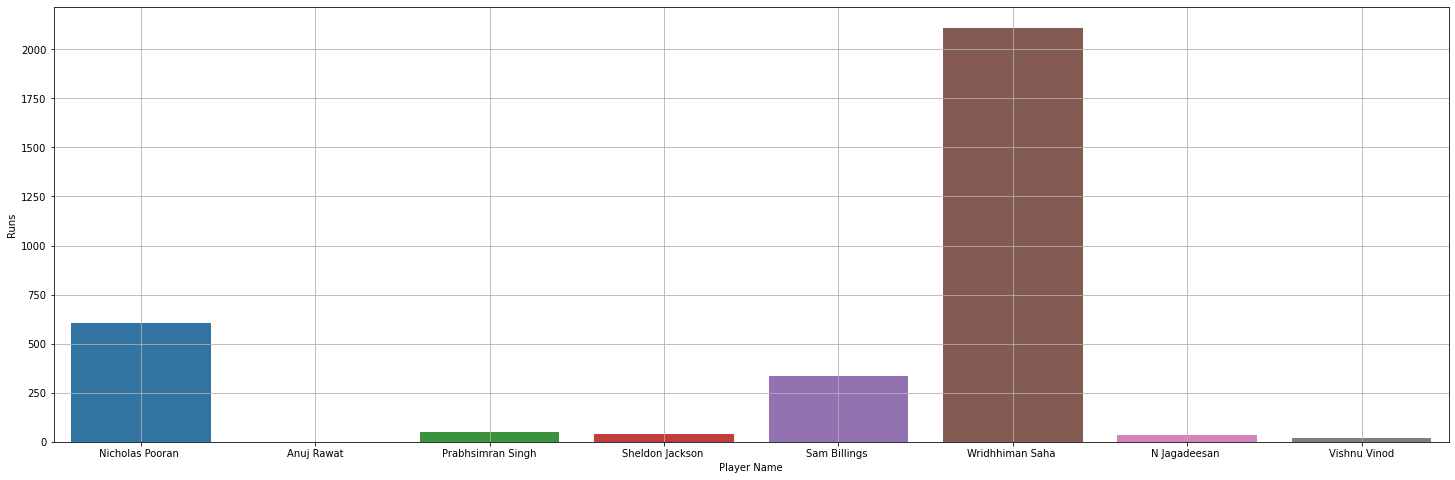

In [76]:
# Visualization top keeper Runs
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Runs',data=top_kepper)
plt.grid(True)
plt.show()

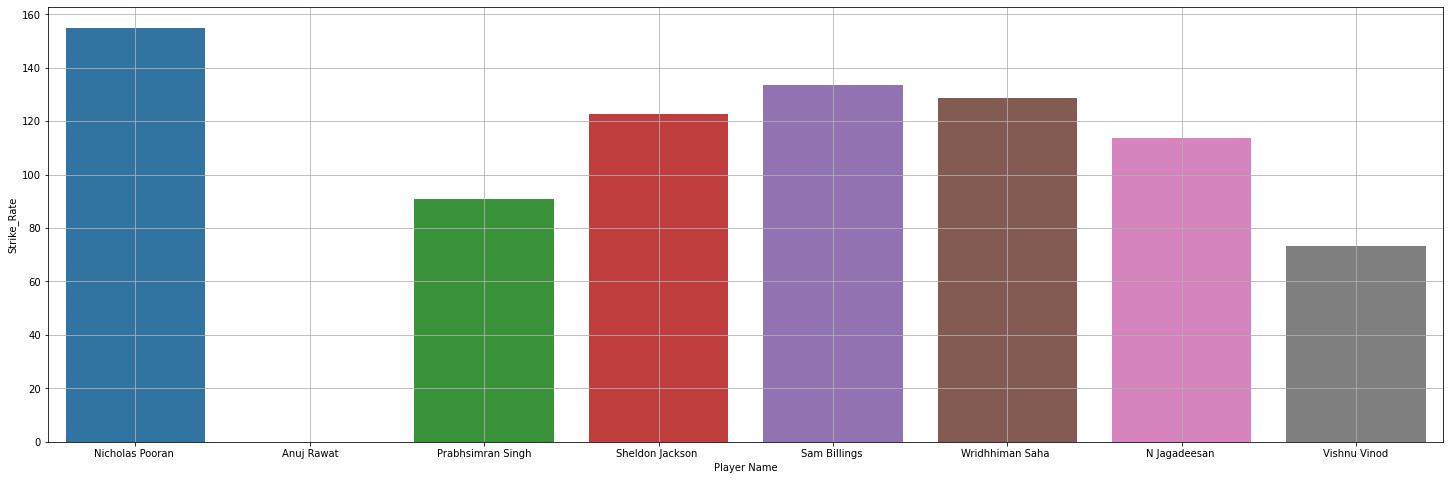

In [77]:
# Visualization top keeper Strike_Rate
plt.figure(figsize=(25,8))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_kepper)
plt.grid(True)
plt.show()

# As per Analysis Best playing 11

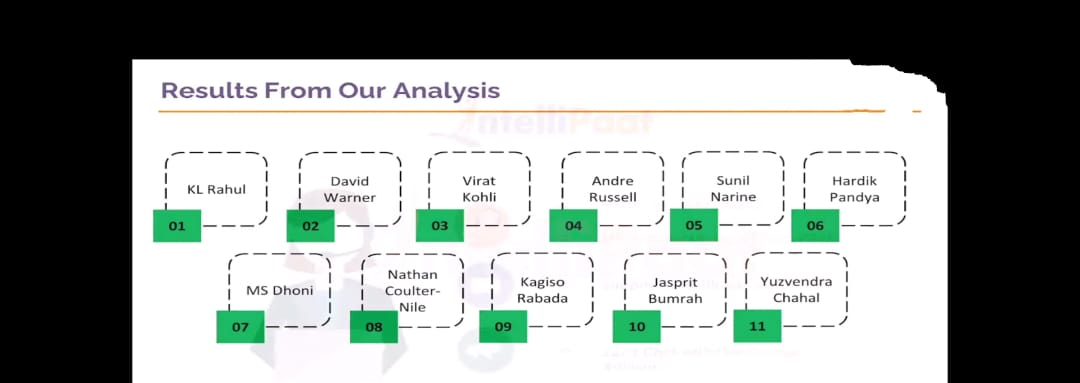